In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [3]:
# Summarize Training Dataset
print(train_dataset.info(), end="\n\n")
print(train_dataset.describe(), end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.4865

In [4]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Summarize Test Dataset
print(test_dataset.info(), end="\n\n")
print(test_dataset.describe(), end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209 

In [6]:
# print(train_dataset.columns)
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

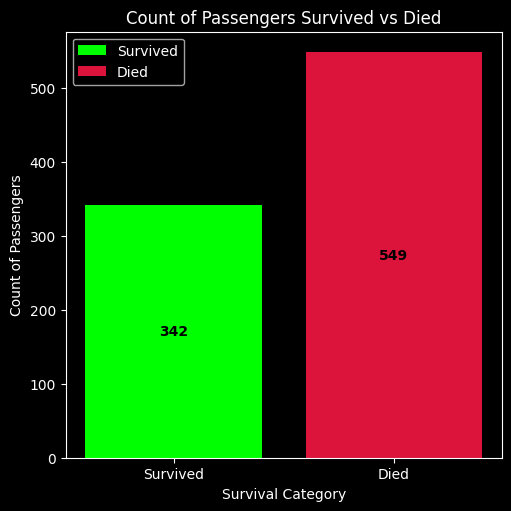

In [14]:
# Visually explore the titanic training dataset

## 1. Count of Survived vs Died passengers
plt.style.use("dark_background")
survived_count = train_dataset["Survived"].value_counts()[1]
died_count = train_dataset["Survived"].value_counts()[0]

fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
survival_labels = ["Survived", "Died"]
survival_counts = [survived_count, died_count]
bar_colors = ['lime', 'crimson']
bar_labels = ['Survived', 'Died']
bar_container = ax.bar(survival_labels, survival_counts, color=bar_colors, label=bar_labels)
ax.bar_label(bar_container, fmt='{:,.0f}', label_type='center', color='black', fontweight='bold')
ax.set_xlabel("Survival Category")
ax.set_ylabel("Count of Passengers")
ax.set_title("Count of Passengers Survived vs Died")
ax.legend()
plt.show()

In [9]:
male_passengers_survival_counts = train_dataset[train_dataset['Sex'] == 'male'][['Survived']].groupby("Survived").value_counts()
female_passengers_survival_counts = train_dataset[train_dataset['Sex'] == 'female'][['Survived']].groupby("Survived").value_counts()

male_survival_percentage = np.round(male_passengers_survival_counts[1]/male_passengers_survival_counts.sum(), 2) * 100
female_survival_percentage = np.round(female_passengers_survival_counts[1]/female_passengers_survival_counts.sum(), 2) * 100

print(f"Female Passengers Survived: {female_passengers_survival_counts[1]}\n"
      f"Female Passengers Survived: {female_passengers_survival_counts[0]}\n"
      f"Male Passengers Survived: {male_passengers_survival_counts[1]}\n"
      f"Male Passengers Died: {male_passengers_survival_counts[0]}\n")

Female Passengers Survived: 233
Female Passengers Survived: 81
Male Passengers Survived: 109
Male Passengers Died: 468


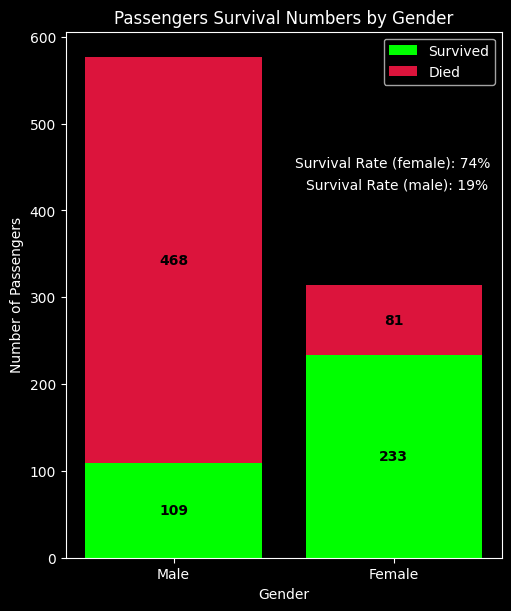

In [15]:
fig, ax = plt.subplots(figsize=(5, 6), layout="constrained")
survived_counts = [int(male_passengers_survival_counts[1]), int(female_passengers_survival_counts[1])]
died_counts = [int(male_passengers_survival_counts[0]), int(female_passengers_survival_counts[0])]
bc1 = ax.bar(['Male', 'Female'], survived_counts, color='lime')
bc2 = ax.bar(['Male', 'Female'], died_counts, bottom=survived_counts, color='crimson')
ax.bar_label(bc1, fmt='{:,.0f}', label_type='center', color='black', fontweight='bold')
ax.bar_label(bc2, fmt='{:,.0f}', label_type='center', color='black', fontweight='bold')
ax.text(0.55, 450, f"Survival Rate (female): {int(female_survival_percentage)}%")
ax.text(0.60, 425, f"Survival Rate (male): {int(male_survival_percentage)}%")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Passengers")
ax.set_title("Passengers Survival Numbers by Gender")
ax.legend([bc1[0], bc2[0]], ('Survived', 'Died'))
plt.show()

In [162]:
train_dataset._get_numeric_data().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

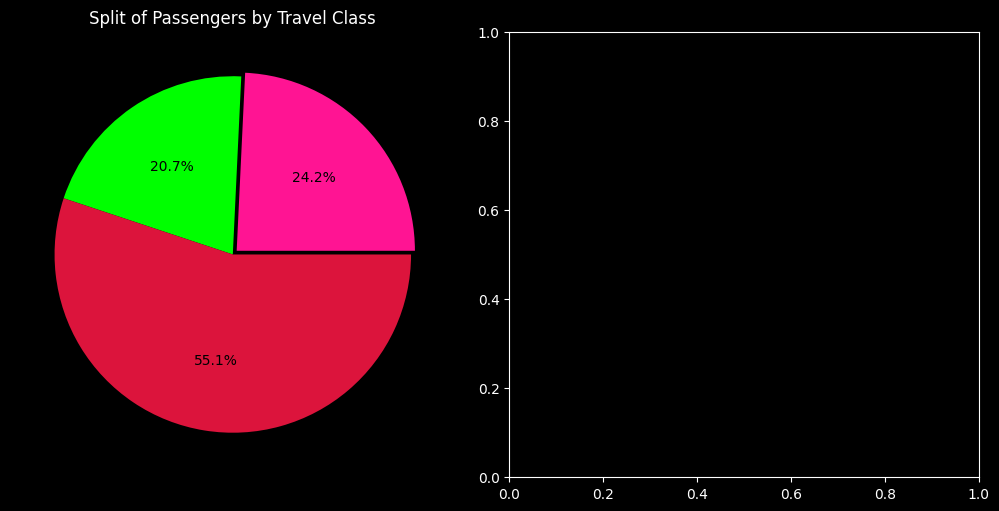

In [17]:
distinct_passenger_class = train_dataset.groupby("Pclass")["Pclass"].count()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
axs[0].pie(distinct_passenger_class, labels=list(distinct_passenger_class.index), autopct='%1.1f%%', colors=["deeppink", "lime", "crimson"], explode=(0.03, 0, 0), textprops=dict(color="white"))
axs[0].set_title("Split of Passengers by Travel Class")
plt.show()

In [195]:
distinct_passenger_class = train_dataset.groupby("Pclass")["Pclass"].count()
distinct_passenger_class

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [197]:
216/(491+184+216)

0.24242424242424243